# Homework 5: An External Forcing Experiment

Name: Mason Jones

Date: 9/22/2025

#### Overview
In class, we set up the MITgcm `global_ocean_ebm` configuration with the `exf` package to run on MITgcm. In this assignment, we will assess the output of this model configuration. 

To begin, import the Python modules for manging and plotting data, and making movies. Then, define a path to your homework 5 directory. Finally, the `diags` folder on Spartan to your local machine.

In [6]:
# import pertinent modules
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

# define a path to the diags directory
diags_dir = '/Users/masonjones/Desktop/MS274/HW5/diags'

### Part 1: Choose Variables to Examine 
In this assignment, you'll investigate the relationship between a state variable (temperature, salinity, or velocity) and an associated forcing variable (heat flux, freshwater flux, or wind stress). 

In the markdown cell below, indicate which pair of variables you're going to investigate.

I'll investigate temperature with variable freshwater flux

### Part 2: Make a Movie
Next, make a movie for your variables of interest. The movie should show your state variable in one panel and your forcing variable in another panel. If you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [29]:
temp_file = os.path.join(diags_dir, 'diagSurf', 'diagSurf.0000000010.data')
fresh_file = os.path.join(diags_dir, 'diagsEXF', 'diagsEXF.0000000010.data')

# read in the file and reshape it to the proper dimensions
grid = np.fromfile(temp_file, '>f4').reshape((2,40,90))
temp_grid = grid[0,:,:]

grid = np.fromfile(fresh_file, '>f4').reshape((4,40,90))
fresh_grid = grid[3,:,:]

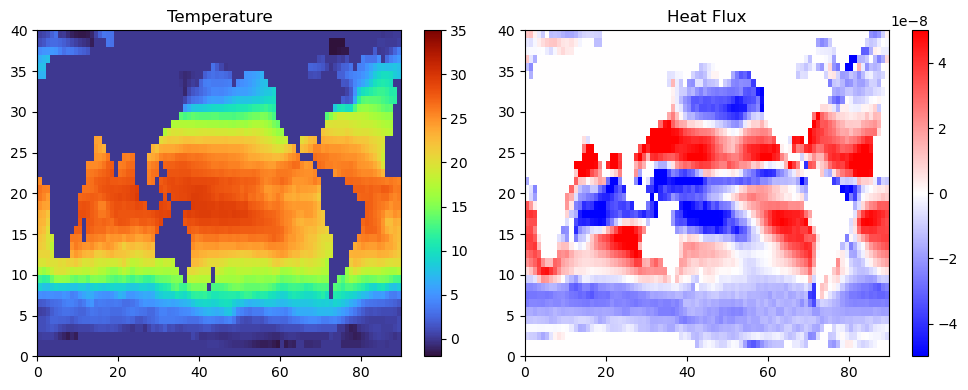

In [28]:
# make a figure object
fig = plt.subplots(1, 2, figsize=(10,4))

# plot the field
plt.subplot(1, 2, 1)
plt.pcolormesh(temp_grid, cmap='turbo', vmin = -2, vmax = 35)

plt.colorbar()
plt.title('Temperature')

plt.subplot(1, 2, 2)
plt.pcolormesh(fresh_grid, cmap='bwr', vmin = -5e-8, vmax = 5e-8)

plt.colorbar()
plt.title('Heat Flux')

plt.tight_layout()

# show the figure
plt.show()

In [30]:
def plot_frame(temp_file, fresh_file, image_path):

    # make a figure object
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # read in the file and reshape it to the proper dimensions
    grid = np.fromfile(temp_file, '>f4').reshape((2,40,90))
    temp_grid = grid[0,:,:]

    grid = np.fromfile(fresh_file, '>f4').reshape((4,40,90))
    fresh_grid = grid[3,:,:] 
    
    # plot the field
    plt.subplot(1, 2, 1)
    plt.pcolormesh(temp_grid, cmap='turbo', vmin = -2, vmax = 35)
    plt.colorbar()
    plt.title('Temperature')

    plt.subplot(1, 2, 2)
    plt.pcolormesh(fresh_grid, cmap='bwr', vmin = -5e-8, vmax = 5e-8)
    plt.colorbar()
    plt.title('Fresh Water Heat Flux')

    plt.tight_layout()

    # show the figure
    plt.savefig(image_path)
    plt.close(fig)



In [31]:
file_list = []

startday = 30
endday = 7290
step = 20

# loop through each day of the year
for day in range(startday,endday, step): #1 to 366 for full loop

    # identify the data file path
    temp_file = os.path.join(diags_dir, 'diagSurf', 'diagSurf.'+'{:010d}'.format(day)+'.data')
    fresh_file = os.path.join(diags_dir, 'diagsEXF', 'diagsEXF.'+'{:010d}'.format(day)+'.data')
    
    # identify the image file path
    image_path = os.path.join(diags_dir, 'plots', 'snapshot.'+'{:010d}'.format(day)+'.png')

    # call the plotting function
    plot_frame(temp_file, fresh_file, image_path)

    # add the imaghe path to the file path list (for the next step)
    file_list.append(image_path)

In [32]:
# set the frames per second
fps=5

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(diags_dir, 'plots', 'movie.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/masonjones/Desktop/MS274/HW5/diags/plots/movie.mp4.
Moviepy - Writing video /Users/masonjones/Desktop/MS274/HW5/diags/plots/movie.mp4



Moviepy - Done !
Moviepy - video ready /Users/masonjones/Desktop/MS274/HW5/diags/plots/movie.mp4


Comment on any features you observe in your movie. Place particular focus on the potential connection(s) between your state variable and the forcing.

The main trends that i noticed were how seasons made quite a big difference in the father nothern and southern hemispheres but stayed more constant near the equator. It makes it really clear when the rainy seasons are and how that water is distributed into the ocean. Also the warmer temperatures created a larger singal on the freshwater input map which was cool.  

###Part 3: Plot Time Series at a Location
Based on your movie, choose an interesting place in your model domain and create a timeseries of your variables at this location. There should be two plots - either as two horizontal subplots (one for each variable), or one plot with two separate y-axes for the different variables.

Again you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [50]:
# spot in the california current of of davenport
lon= 37
lat = -122.5

lesson_folder = '/Users/masonjones/Desktop/MS274/HW5'
# read in the XC and YC fields
xc_file = os.path.join(lesson_folder, 'XC.data')
XC = np.fromfile(xc_file, '>f4').reshape((40,90))

yc_file = os.path.join(lesson_folder, 'YC.data')
YC = np.fromfile(yc_file, '>f4').reshape((40,90))

depth_path = os.path.join(lesson_folder, 'depth.data')

depth = np.fromfile(depth_path, '>f4').reshape((40,90))

# find its location in the grid
dist = ((XC - lon)**2 + (YC - lat)**2)**0.5
row, col = np.where(dist==np.min(dist))

In [68]:
# make an empty array
nx, ny = 90, 40
nyears = 20
ndays_per_year = 365
nsteps = nyears * ndays_per_year

days = np.arange(1, nsteps + 1)

temp_timeseries  = np.zeros(nsteps)
fresh_timeseries = np.zeros(nsteps)

for i, day in enumerate(days):
    temp_file  = os.path.join(diags_dir, "diagSurf", f"diagSurf.{day:010d}.data")
    fresh_file = os.path.join(diags_dir, "diagsEXF",  f"diagsEXF.{day:010d}.data")

    try:
        temp_grid  = np.fromfile(temp_file,  ">f4").reshape(2, ny, nx)[0]
        fresh_grid = np.fromfile(fresh_file, ">f4").reshape(4, ny, nx)[3]
        temp_timeseries[i]  = temp_grid.mean()
        fresh_timeseries[i] = fresh_grid.mean()
    except:
        continue

 # sample the data at the point provided and store it in the array
temp_timeseries[day-1] = temp_grid[row[0], col[0]]
fresh_timeseries[day-1] = fresh_grid[row[0], col[0]]

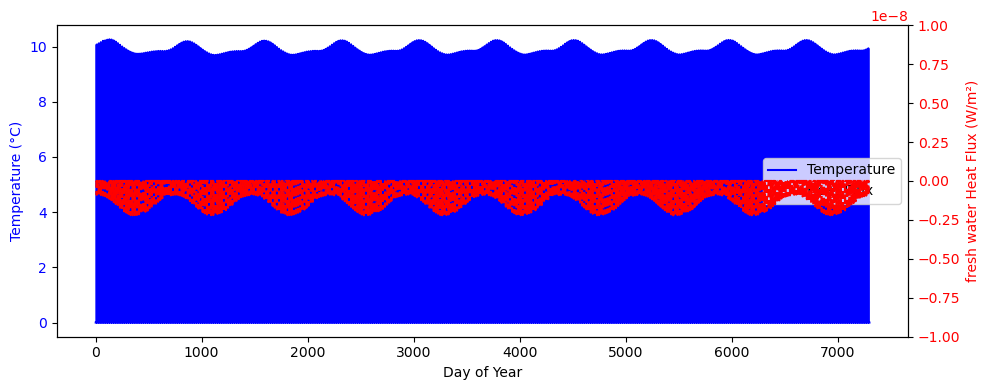

In [72]:
fig, ax1 = plt.subplots(figsize=(10,4))

# temperature on left y-axis
ax1.plot(days, temp_timeseries, color='blue', label='Temperature')
ax1.set_xlabel("Day of Year")
ax1.set_ylabel("Temperature (°C)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Fresh water heat flux on right y-axis
ax2 = ax1.twinx()
ax2.plot(days, fresh_timeseries, color='red', linestyle='--', label='Heat Flux')
ax2.set_ylabel("fresh water Heat Flux (W/m²)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# set y-limits for heat flux
ax2.set_ylim(-1e-8, 1e-8)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

fig.tight_layout()
plt.show()


Comment on any features you observe in your timeseries. Place particular focus on the potential connection(s) between your state variable and the forcing. Is there anything you observe in your timeseries that you didn't catch by eye in your movie?

During the largest amount of freshwater influx is when the largest drop in temperature occurs from this area in the california current just off of davenport. This could also coincide with the winter season each year. This is cool to see as the movie show this season change on a global scale. 